# In-class Assignment: Graph Theory and Cell Towers
# Day 11
# CMSE 202

In this assignment you will work with your group to develop a program to use a color graphing algorithm to select frequencies for cell towers around MSU.  There are four major parts to this assignment.  Try to make sure you get through all of it, but don't stress too much if you don't finish.

### Agenda for today's class:

1. [Part 1: Download and import the data](#p1)
2. [Part 2: K-nearest neighbor graph](#p2)
3. [Part 3: Greedy graph coloring](#p3)
4. [Part 4: Plotting towers and their colors on a map](#p4)

### <p style="text-align: right;"> &#9989; Maria Faraj </p>
#### <p style="text-align: right;"> &#9989; Elizabeth, Saman, Kristen, Nithea</p>

---
# Problem Statement

**As was presented in the pre-class assignment**, the signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="500px"><p style="text-align: right;">From: http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "500px"><p style="text-align: right;">From:  http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State.

<img src='https://i.ibb.co/jv2vLBr/MSU-Towers.png' width = "500px">
<p style="text-align: right;">From: http://www.antennasearch.com/</p>

Another problem is that cellphone companies have to pay for each frequency range they use.  So they would like minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

In this assignment you are going to work as a group to solve this problem using graph coloring.

---
<a id="p1"></a>
## Part 1: Download and import the data

We will be using antenna data from the following website:

http://www.antennasearch.com/

**&#9989;  Do This:** We previously downloaded a CSV file from this website for all of the **towers** in a 3 Mile radius from the MSU engineering building (428 S Shaw Lane, East Lansing, MI 48824). **You can download this file from here:**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/TowersYYH730463QHM18572.csv`

Make sure that the downloaded file is in the same directory as your in-class notebook.

**Optional**: Feel free to try running the same search and take a look at just the **towers**. When you start to visualize the data in the file we've shared you can see if any new towers have been added since the data was last pulled.

Finall, **write a function** to load the file into Python and generate a list of latitude and longitude for the towers.

In [29]:
# Put your function here!
import pandas as pd
tower = pd.read_csv('TowersYYH730463QHM18572.csv')
lat = tower['latitude'].to_list()
long = tower['longitude'].to_list()
points = list(zip(long, lat))
points = np.asarray(points)
print(points)


[[-84.50836111  42.70669444]
 [-84.515       42.72833333]
 [-84.51191667  42.73963889]
 [-84.48241667  42.71641667]
 [-84.49538889  42.72619444]
 [-84.51961111  42.72027778]
 [-84.50738889  42.7315    ]
 [-84.44780556  42.7485    ]
 [-84.50441667  42.68875   ]
 [-84.52691667  42.72272222]
 [-84.50855556  42.74327778]
 [-84.45469444  42.74586111]
 [-84.51913889  42.72030556]
 [-84.51330556  42.74919444]
 [-84.50608333  42.76586111]
 [-84.48386111  42.77336111]
 [-84.47997222  42.73558333]
 [-84.48358333  42.73725   ]
 [-84.49472222  42.72611111]
 [-84.49580556  42.72669444]
 [-84.48025     42.74280556]
 [-84.50552778  42.73030556]
 [-84.50561111  42.73425   ]
 [-84.50805556  42.73977778]
 [-84.45108333  42.72280556]
 [-84.50775     42.70697222]]


**&#9989;  Do This:** Generate a plot similar to the following showing the towers on the x-y plane.

<img src="https://i.ibb.co/bd2g2Hf/tower-graph.png">


Text(0.5, 1.0, 'example tower location')

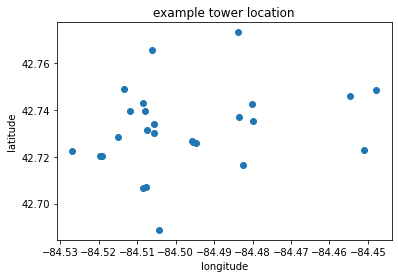

In [9]:
# Put your plotting code here.
import matplotlib.pyplot as plt
import numpy as np



# def randomplot(n): 
#     x = np.random.rand(n)
#     y = np.random.rand(n)
#     newtower = np.column_stack((x, y))
#     return newtower

import matplotlib.pyplot as plt



# xvalues = celltower[:, 0]
# yvalues = celltower[:, 1]


plt.scatter(tower['longitude'], tower['latitude'])
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('example tower location')

&#9989; **Question 1**: By default `matplotlib.pyplot.scatter` will scale the x-axis and y-axes to best fit the points. However, sometimes (as is the case here) we want the scaling of both axes to be equal.  What command can you use for the above plot to ensure that the distances are the same in the x-direction as the y-direction?

<font size=+3>&#9998;</font> 


---
<a id="p2"></a>
## Part 2: Generating a K-Nearest Neighbor Graph

In the pre-class assignment, you were asked to try and write an algorithm that found the nearest neighbor for every point in a collection of points. There's not necessarily one right way to solve this problem, so your solution might have looked quite a bit different this (or perhaps you didn't quite get things working), but here's one possible solution:

In [59]:
# Possible solution for the nearest-neighbor algorithm
import math
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
def nearest_neighbors(points):
    '''Generates an adjacency list based on the Nearest neighbor graph algorithm.'''
    G = dict()
    for p in range(0,len(points)):
        min_distance = np.inf
        min_point = -1
        for n in range(0,len(points)):
            if p != n:
                d = distance(points[p], points[n])
                if d < min_distance:
                    min_distance = d
                    min_point = n
        if min_point == -1:
            print("ERROR-point not found")
        G[p] = [min_point]
    return G

**But what if we wanted to find the nearest *2* neighbors? The nearest 3? More?**

**&#9989;  Do This:** Next **write a function that generates a graph using the k-nearest neighbor graph algorithm**.  More information about the nearest neighbor and k-nearnest neighbor algorithm can be found here:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

The KNN graph is very similar to the nearest neighbor graph you did in the pre-class assignment. However, now instead of only finding the closest point to each point you find the k-closest points.

**Important note**: While the nearest-neighbor and KNN problems are similar, the same approach may not work well for both solutions! You should think this through and talk about it with your group. **How will you tackle this problem?**

In [72]:
def nearest_neighbors(points, k):
    '''Generates an adjacency list based on the Nearest neighbor graph algorithm.'''
    G = dict()
    for p in range(0,len(points)):
        min_distance = np.inf
        min_point = -1
        distance = []
        for n in range(0,len(points)):
            if p != n:
                distance.append((n,d))
                #d = distance(points[p], points[n])
                distance.append((n,d))
                if d < min_distance:
                    min_distance = d
                    min_point = n
        if min_point == -1:
            print("ERROR-point not found")
        distance.sort(key=lambda x: x[1])
        k_nearest_neighbors = [n for n, _ in distance[:k]]
        
        G[p] = [k_nearest_neighbors]
    return G

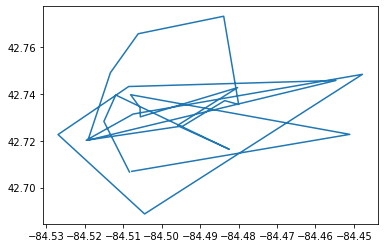

In [79]:
# Put your k-nn function here

import numpy as np
import math
import networkx as nx


k=1

G_dict = nearest_neighbors(points, k)
knn_graph.add_nodes_from(range(len(points)))

plt.plot(points[:,0], points[:,1])




# for k in G_dict:
#     x=[points[k,0], points[G_dict[k][0],0]]
#     y=[points[k,1], points[G_dict[k][0],1]]
#     plt.plot(x,y)






**&#9989; Do This:**  It is important to test code.  How do you know if your K-NN algorithm is working? Trying writing a function that tests if your code is right. Try changing the inputs and the values for ```k``` and make sure it behaves correctly. One important test would be ensuring it works when *k=1* as this should reproduce the nearest neighbor graph.

In [ ]:
# Put some testing code here


**&#9989; Do This:** Using the tower locations from Part 1, generate a figure similar to the following:

<img src="https://i.ibb.co/1dd1rz9/knn-graph.png">  

While the above graph displays the network, clearly not a lot of attention was given to the aesthetics!

In [ ]:
# Put the code that makes your cell tower plot here


---
<a id="p3"></a>
## Part 3: Greedy Graph Coloring

Next we will run a greedy graph coloring algorithm on your K-NN graph with k = 3 and plot the towers in the x-y plane colored to match the frequency selected. For example:

<img src="https://i.ibb.co/mFwd72V/knn-color-graph.png">

**&#9989; Do This:** Using networkx, apply the "greedy" graph coloring algorithm to the K-NN graph (K=3) developed in part 2 of the tower data downloaded in part 1.  

In [ ]:
# Plot your colored cell tower graph here.


---
<a id="p4"></a>
## Part 4: Plot tower colors on a map
Finally plot the towers on a map and set the marker colors to your individual frequency colors. Something like the following:

<img src="https://i.ibb.co/Rvx2rJn/Screen-Shot-2021-02-22-at-10-01-20-PM.png" width="800px">

**Note**: In order to overlay the tower locations as points on map, you'll like need to find a python package that can help you do this. We explored some such options in a previous class period!

**&#9989; Do This:** First, write some test code to generate a map with colored points using whatever package you chose to use.

In [ ]:
#Put your test code here


**&#9989; Do This:** Finally, put it all together.  Generate a map with markers colored based on the frequencies selected in the graph coloring algorithm in part 3.  Use the K-NN graph with ```k=3``` generated from part 2 of the tower data downloaded from part 1. 

In [ ]:
# Put your map code here


----

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University